In [327]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [328]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [329]:
df = pd.read_csv("german_credit.csv")

In [330]:
df.shape

(1000, 21)

In [331]:
non_numeric_cols = ['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker']

In [332]:
len(non_numeric_cols)

13

In [333]:
new_df_object = df.select_dtypes(include=object)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [335]:
new_df_object.head(2)

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes


In [336]:
df.foreign_worker.value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [337]:
dummies = pd.get_dummies(new_df_object)

In [338]:
new_df_numeric = df.select_dtypes(include=np.number)

In [339]:
df_encoded = pd.concat([new_df_numeric, dummies],axis=1)

In [341]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [343]:
# Print Shape of model data
df_encoded.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [344]:
df_encoded.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [345]:
#not needed

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(df.foreign_worker)
X = df_encoded.drop("default",axis=1)
y = df_encoded["default"]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=0)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [347]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [355]:
X.shape

(1000, 61)

In [348]:
ytest.shape

(300,)

In [349]:
ytest.value_counts()

0    214
1     86
Name: default, dtype: int64

In [354]:
from sklearn import metrics
y_predict = rfc.predict(xtest)
print("accuracy        :",rfc.score(xtest , ytest))
print("confusion matrix:\n",metrics.confusion_matrix(ytest, y_predict))

accuracy        : 0.76
confusion matrix:
 [[190  24]
 [ 48  38]]


### Q6 Show the list of the features importance( 1 Marks)

In [356]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [357]:
feature_importances

,importance
credit_amount,0.100844
duration_in_month,0.077155
age,0.075707
account_check_status_no checking account,0.048111
account_check_status_< 0 DM,0.034319
present_res_since,0.034185
installment_as_income_perc,0.033802
credit_history_critical account/ other credits existing (not at this bank),0.019579
credits_this_bank,0.019288
property_real estate,0.018942


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [358]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [359]:
# Use below values
num_folds = 10
seed = 77
kf = KFold(n_splits=num_folds,random_state=77,shuffle=False)

In [360]:
#Validate the Random Forest model build above using k fold

In [361]:
allaccuracies = cross_val_score(estimator=rfc,X=X,y=y,cv=kf)

In [362]:
#Calculate Mean score

In [363]:
allaccuracies

array([0.86, 0.71, 0.76, 0.79, 0.8 , 0.67, 0.74, 0.8 , 0.76, 0.76])

In [367]:
allaccuracies.mean()*100

76.5

In [368]:
# Calculate score standard deviation using std()

In [369]:
allaccuracies.std()*100

4.984977432245808

# Q8 Print the confusion matrix( 1 Marks)

In [370]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [378]:
kf = KFold(n_splits=num_folds,random_state=seed,shuffle=False)
kf.get_n_splits(X)
i=1
print("confusion matrix:")
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc.fit(X_train, y_train)
    print (i,"\n",confusion_matrix(y_test, rfc.predict(X_test)))
    i=i+1
    print(10* '#')

confusion matrix:
1 
 [[69  6]
 [ 8 17]]
##########
2 
 [[62  6]
 [23  9]]
##########
3 
 [[68  9]
 [15  8]]
##########
4 
 [[63  9]
 [12 16]]
##########
5 
 [[72  0]
 [20  8]]
##########
6 
 [[57  2]
 [31 10]]
##########
7 
 [[63  7]
 [19 11]]
##########
8 
 [[66  2]
 [18 14]]
##########
9 
 [[65  6]
 [18 11]]
##########
10 
 [[64  4]
 [20 12]]
##########


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [379]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [382]:
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    rs = recall_score(y_test, y_pred, average='macro')
    ps = precision_score(y_test, y_pred, average='macro')
    print("Recall:",rs,"\tPrecision:",ps)
    print(10* '#')



Recall: 0.8 	Precision: 0.8176171654432524
##########
Recall: 0.5965073529411764 	Precision: 0.6647058823529411
##########
Recall: 0.6154714850367025 	Precision: 0.6449326718639263
##########
Recall: 0.7232142857142857 	Precision: 0.74
##########
Recall: 0.6428571428571428 	Precision: 0.8913043478260869
##########
Recall: 0.6050020669698222 	Precision: 0.740530303030303
##########
Recall: 0.6333333333333333 	Precision: 0.6897018970189702
##########
Recall: 0.7040441176470589 	Precision: 0.8303571428571428
##########
Recall: 0.6474016512870325 	Precision: 0.7150956768249468
##########
Recall: 0.6580882352941176 	Precision: 0.7559523809523809
##########


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [ ]:
#Hint: Use roc_curve

AUC: 0.846


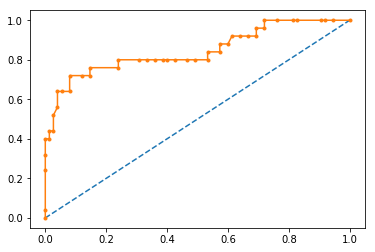

AUC: 0.746


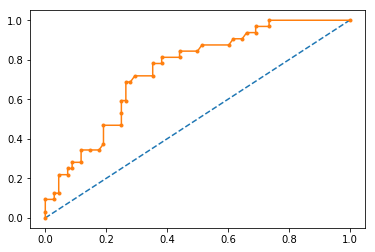

AUC: 0.791


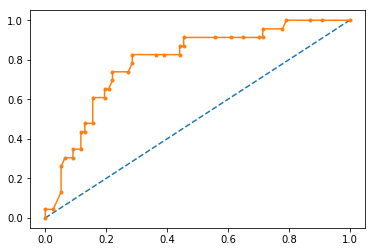

AUC: 0.799


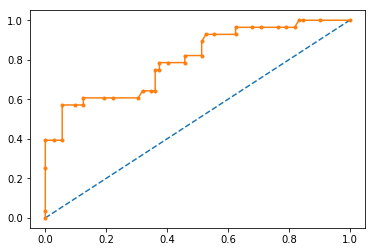

AUC: 0.815


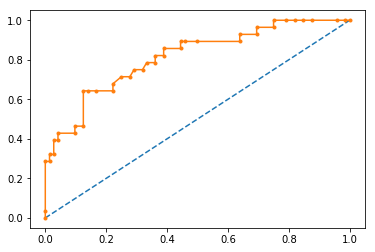

AUC: 0.845


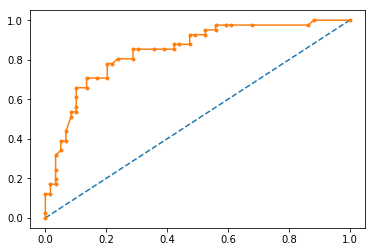

AUC: 0.773


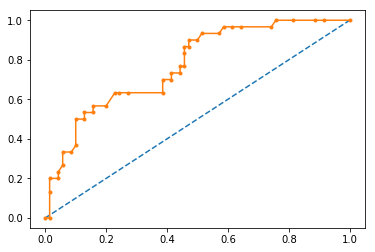

AUC: 0.833


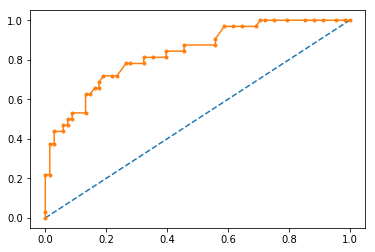

AUC: 0.828


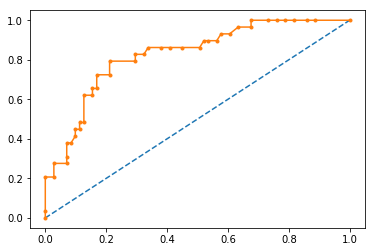

AUC: 0.772


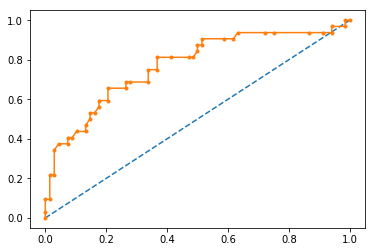

In [383]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc.fit(X_train, y_train)
    probs = rfc.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [ ]:
#done above

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [389]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [390]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfc.fit(X_, y_)
    y_pred = rfc.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [391]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.745
Standard deviation:  0.02418677324489567
